# CW-08 Julia In Julia Tutorial Exercise
## Task 4 & 5
## Lance Clifner, Eric Freda
CS-510
<br>October 18, 2016

In [1]:
"""
juliamap(c,z; maxiter) :
  Implement the iteration algorithm for a Julia Set.

**Returns:** integer number of iterations, or zero
if the iteration never diverges.

 - c : complex constant definining the set
 - z : complex number being iterated
 - maxiter : maximum iteration number, defaults to 100
"""
function juliamap(c, z; maxiter=100)
    for n = 1:maxiter
        z = z^2 + c
        if abs(z) > 2
            return n
        end
    end
    return 0
end

@doc juliamap

juliamap(c,z; maxiter) :   Implement the iteration algorithm for a Julia Set.

**Returns:** integer number of iterations, or zero if the iteration never diverges.

  * c : complex constant definining the set
  * z : complex number being iterated
  * maxiter : maximum iteration number, defaults to 100


In [2]:
# Specialize juliamap to c=0
j0(z) = juliamap(0,z)

# Vectorize j0 over arrays of Complex numbers
@vectorize_1arg Complex j0

# List the available methods for j0 for different types
methods(j0)

# 4 methods for generic function "j0":
j0{T<:Complex{T<:Real}}(::AbstractArray{T<:Complex{T<:Real},1}) at operators.jl:380
j0{T<:Complex{T<:Real}}(::AbstractArray{T<:Complex{T<:Real},2}) at operators.jl:381
j0{T<:Complex{T<:Real}}(::AbstractArray{T<:Complex{T<:Real},N}) at operators.jl:383
j0(z) at In[2]:2

That block of code vectorized the function juliamap() so that it is prepared to handle complex numbers efficiently. j0 now has a method that handles this type so that it can be manipulated efficiently with compiled code.

In [3]:
# Create a complex plane
function complex_plane(xmin=-2, xmax=2, ymin=-2, ymax=2; xpoints=2000, ypoints=2000)
    # y is a column vector
    y = linspace(ymin, ymax, ypoints)

    # x uses a transpose, yielding a row vector
    x = linspace(xmin, xmax, xpoints)'

    # z uses broadcasted addition and multiplication to create a plane
    z = x .+ y.*im;

    # The final line of a block is treated as the return value, in the absence
    # of an explicit return statement
end

complex_plane (generic function with 5 methods)

In [4]:
# The vectorized function can be applied directly to the plane
@time cp = complex_plane()
@time j0p = j0(cp)

  0.662794 seconds (544.48 k allocations: 84.948 MB, 1.07% gc time)
  0.778993 seconds (37.81 k allocations: 32.261 MB, 2.23% gc time)


2000x2000 Array{Int64,2}:
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1

This code works by creating 1D arrays for the x and y dimensions, then uses broadcasted operations to create a complex plane represented as an array. The vectorized julia function is then applied to the plane. The comma separates arguments normally. The semicolon separates the normal arguments on the left from the keyword arguments on the right. Keyword arguments need to be used by name (eg. width=4.0)

In [5]:
immutable ComplexPlane
    x :: LinSpace{Float64}
    y :: LinSpace{Float64}
    z :: Array{Complex{Float64},2}
    
    function ComplexPlane(xmin=-2, xmax=2, ymin=-2, ymax=2;
                            xpoints=2000, ypoints=2000)
        x = linspace(xmin, xmax, xpoints)
        y = linspace(ymin, ymax, ypoints)
        z = x' .+ y.*im
        new(x,y,z)
    end
end

In [6]:
cp = ComplexPlane(xpoints=200,ypoints=200);
typeof(cp)

ComplexPlane

In [7]:
print(typeof(cp.x))
j0(cp.z)

LinSpace{Float64}

200x200 Array{Int64,2}:
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  

In this code, a composite type ComplexPlane is defined which contains the x and y axes along with the plane array stored at z. Since this is an immutable composite type, its contents cannot be modified. This is similar to a Python class, however I don't know of a way to make a Python class immutable.

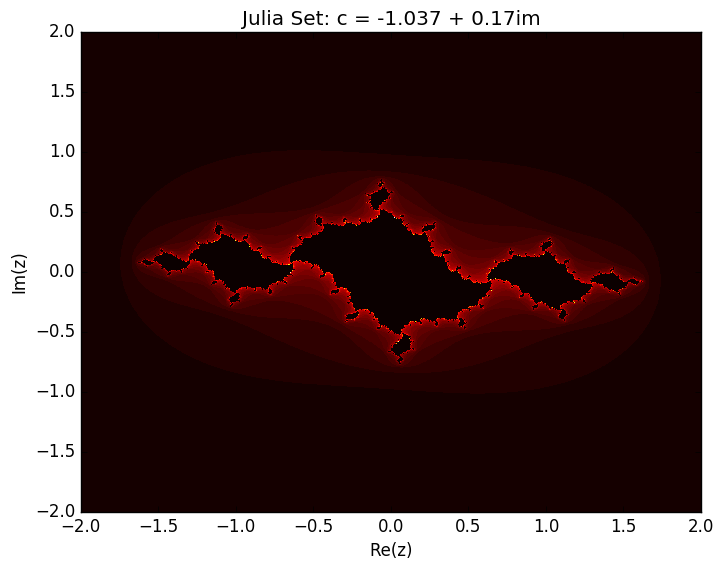

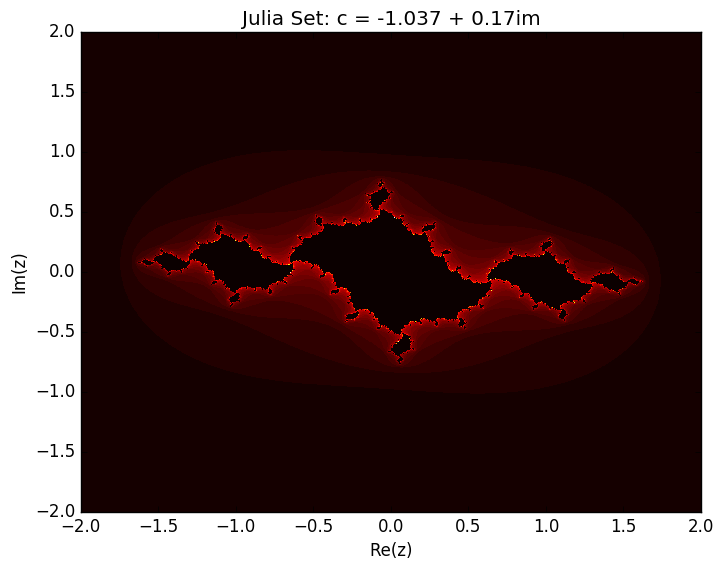

In [14]:
using PyPlot                         #  Load package into the current namespace
c = -1.037 + 0.17im                  #  Set starting point of julia set
j(z) = juliamap(c, z)                #  Create julia map
@vectorize_1arg Complex j            #  Vectorize julia map
cp = ComplexPlane()                  #  Create 2000x2000 point complex plane
jp = j(cp.z);                        #  Apply julia map to entire plane

xlabel("Re(z)")
ylabel("Im(z)")
title("Julia Set: c = " * string(c))
pcolormesh(cp.x, cp.y, jp, cmap=PyPlot.cm_get_cmap("hot"))
display(gcf())                       #  Get Current Figure and display in notebook

# alternatively, instead of displaying in notebook, replace previous line with
# savefig("julia.png")               #  Output figure to png file

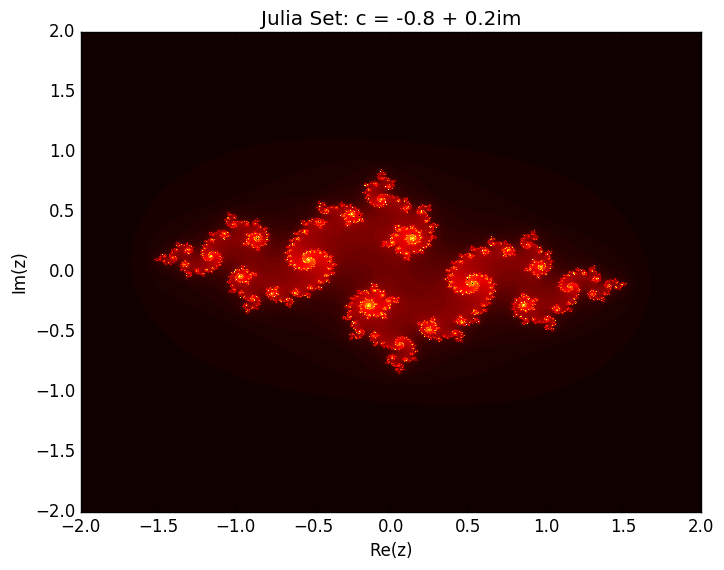

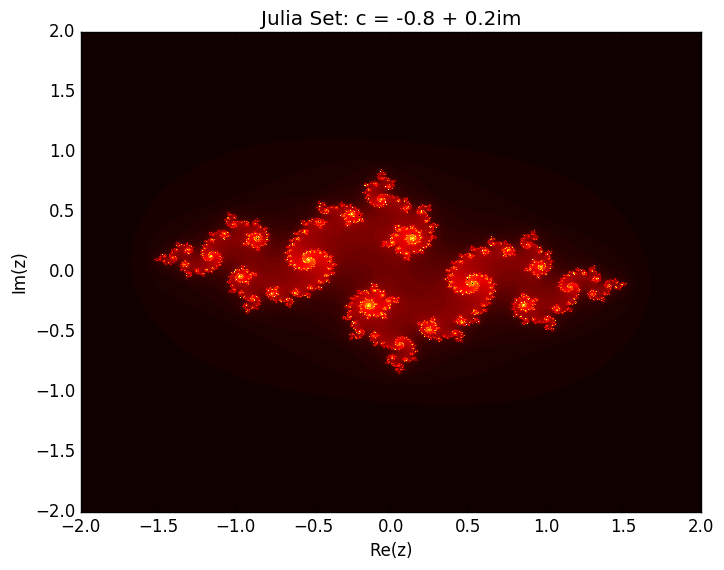

In [15]:
using PyPlot                         #  Load package into the current namespace
c = -0.8 + 0.2im                  #  Set starting point of julia set
j(z) = juliamap(c, z)                #  Create julia map
@vectorize_1arg Complex j            #  Vectorize julia map
cp = ComplexPlane()                  #  Create 2000x2000 point complex plane
jp = j(cp.z);                        #  Apply julia map to entire plane

xlabel("Re(z)")
ylabel("Im(z)")
title("Julia Set: c = " * string(c))
pcolormesh(cp.x, cp.y, jp, cmap=PyPlot.cm_get_cmap("hot"))
display(gcf())                       #  Get Current Figure and display in notebook

# alternatively, instead of displaying in notebook, replace previous line with
# savefig("julia.png")               #  Output figure to png file

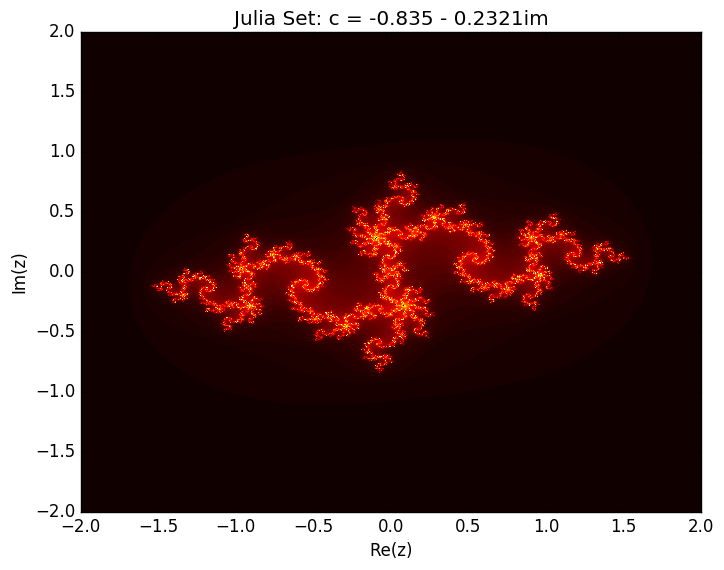

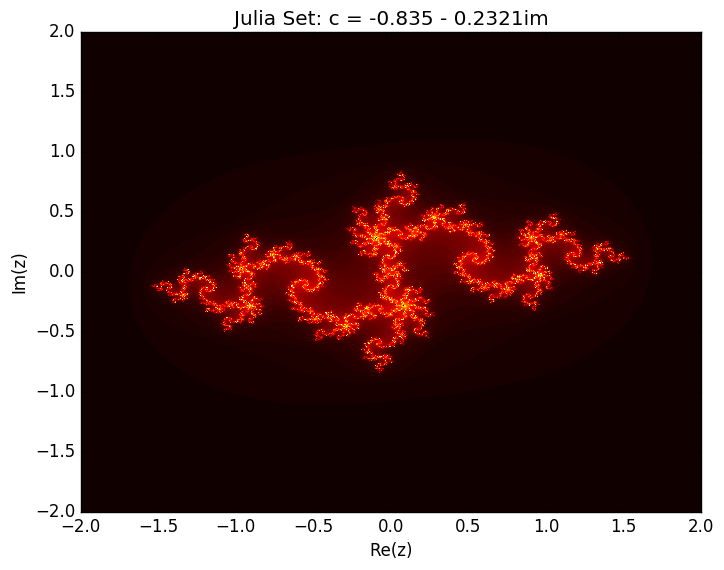

In [16]:
using PyPlot                         #  Load package into the current namespace
c = -0.835 - 0.2321im                  #  Set starting point of julia set
j(z) = juliamap(c, z)                #  Create julia map
@vectorize_1arg Complex j            #  Vectorize julia map
cp = ComplexPlane()                  #  Create 2000x2000 point complex plane
jp = j(cp.z);                        #  Apply julia map to entire plane

xlabel("Re(z)")
ylabel("Im(z)")
title("Julia Set: c = " * string(c))
pcolormesh(cp.x, cp.y, jp, cmap=PyPlot.cm_get_cmap("hot"))
display(gcf())                       #  Get Current Figure and display in notebook

# alternatively, instead of displaying in notebook, replace previous line with
# savefig("julia.png")               #  Output figure to png file

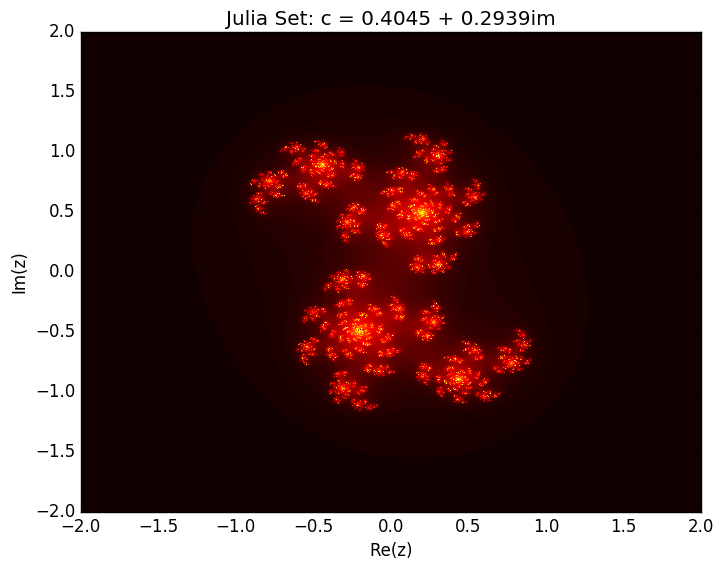

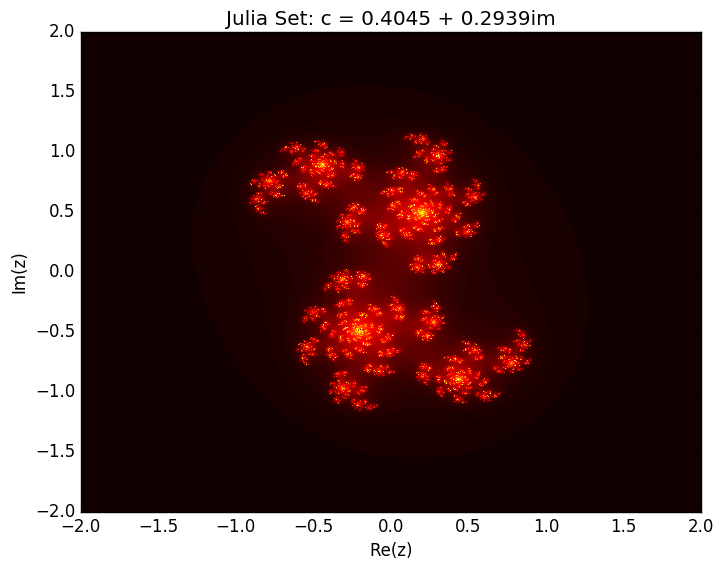

In [17]:
using PyPlot                         #  Load package into the current namespace
c = 0.4045 + 0.2939im                  #  Set starting point of julia set
j(z) = juliamap(c, z)                #  Create julia map
@vectorize_1arg Complex j            #  Vectorize julia map
cp = ComplexPlane()                  #  Create 2000x2000 point complex plane
jp = j(cp.z);                        #  Apply julia map to entire plane

xlabel("Re(z)")
ylabel("Im(z)")
title("Julia Set: c = " * string(c))
pcolormesh(cp.x, cp.y, jp, cmap=PyPlot.cm_get_cmap("hot"))
display(gcf())                       #  Get Current Figure and display in notebook

# alternatively, instead of displaying in notebook, replace previous line with
# savefig("julia.png")               #  Output figure to png file

In [ ]:
using PyPlot                         #  Load package into the current namespace
c = 0.4755 -0.1545im                  #  Set starting point of julia set
j(z) = juliamap(c, z)                #  Create julia map
@vectorize_1arg Complex j            #  Vectorize julia map
cp = ComplexPlane()                  #  Create 2000x2000 point complex plane
jp = j(cp.z);                        #  Apply julia map to entire plane

xlabel("Re(z)")
ylabel("Im(z)")
title("Julia Set: c = " * string(c))
pcolormesh(cp.x, cp.y, jp, cmap=PyPlot.cm_get_cmap("hot"))
display(gcf())                       #  Get Current Figure and display in notebook

# alternatively, instead of displaying in notebook, replace previous line with
# savefig("julia.png")               #  Output figure to png file

In [ ]:
using PyPlot                         #  Load package into the current namespace
c = 0.3535 - 0.3535im                  #  Set starting point of julia set
j(z) = juliamap(c, z)                #  Create julia map
@vectorize_1arg Complex j            #  Vectorize julia map
cp = ComplexPlane()                  #  Create 2000x2000 point complex plane
jp = j(cp.z);                        #  Apply julia map to entire plane

xlabel("Re(z)")
ylabel("Im(z)")
title("Julia Set: c = " * string(c))
pcolormesh(cp.x, cp.y, jp, cmap=PyPlot.cm_get_cmap("hot"))
display(gcf())                       #  Get Current Figure and display in notebook

# alternatively, instead of displaying in notebook, replace previous line with
# savefig("julia.png")               #  Output figure to png file